In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('1553768847_housing.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [7]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace = True)

In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [11]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  9


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [12]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [13]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 9


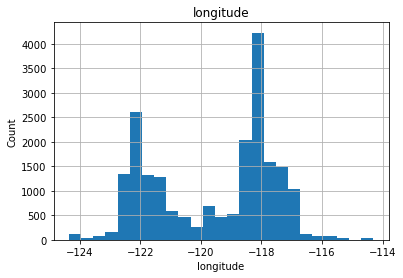

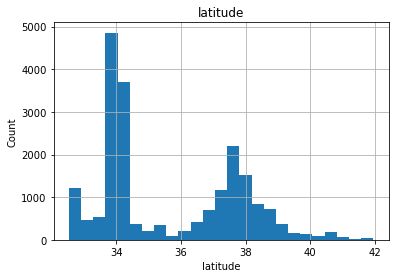

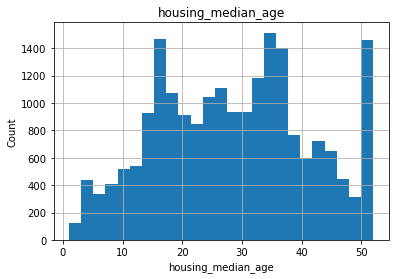

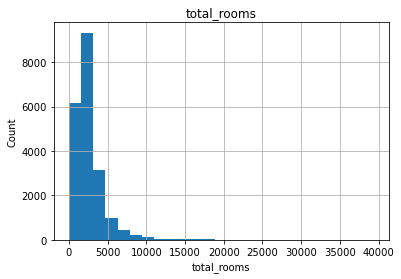

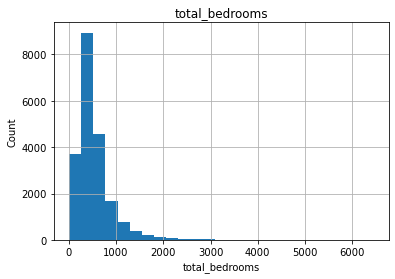

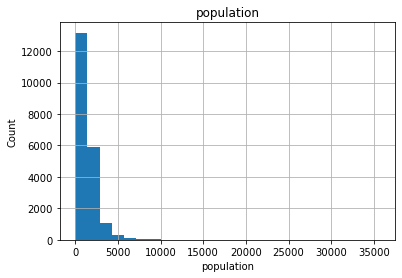

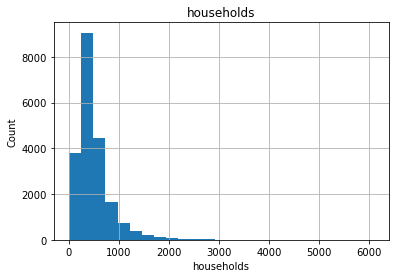

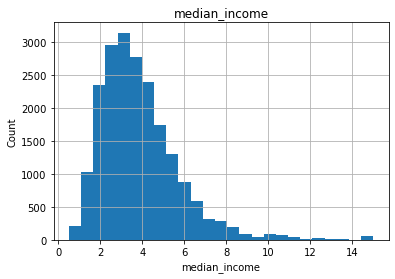

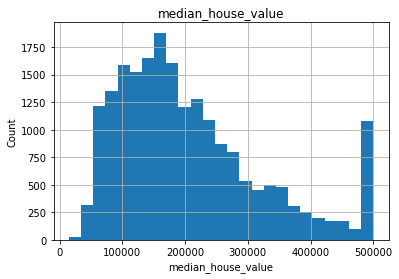

In [14]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

E:\anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


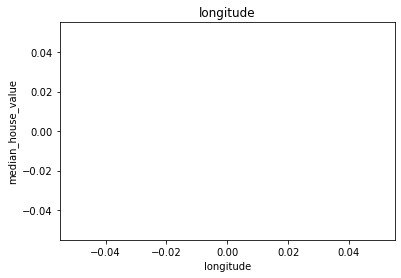

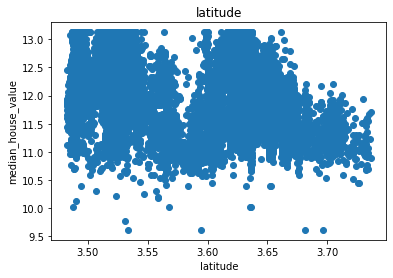

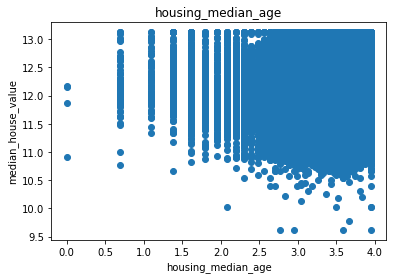

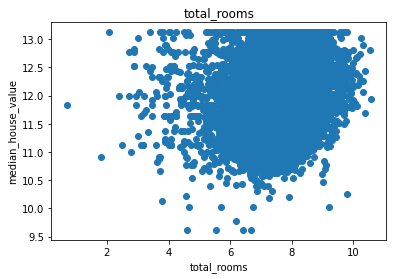

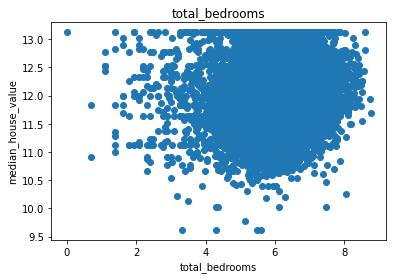

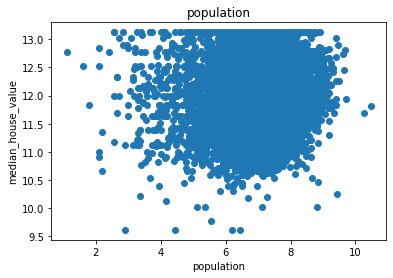

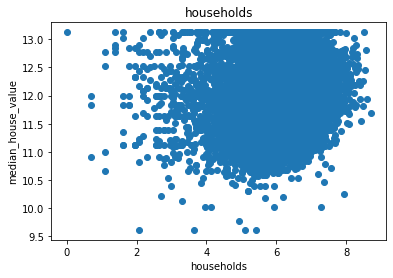

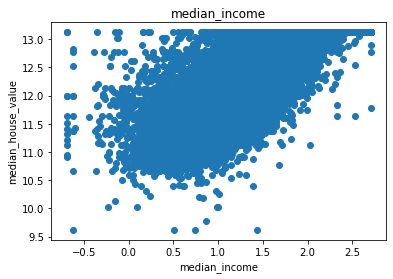

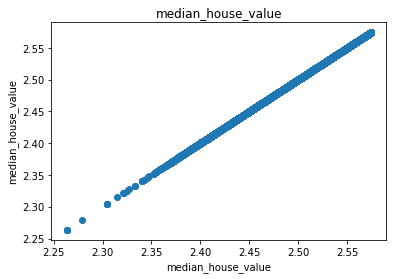

In [15]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['median_house_value']=np.log(data['median_house_value'])
        plt.scatter(data[feature],data['median_house_value'])
        plt.xlabel(feature)
        plt.ylabel('median_house_value')
        plt.title(feature)
        plt.show()

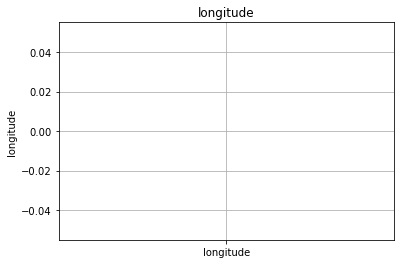

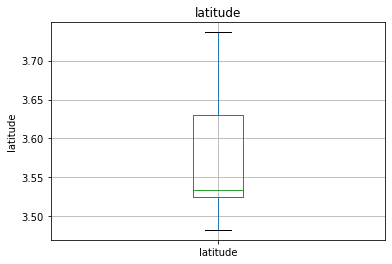

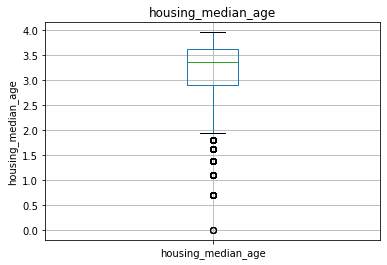

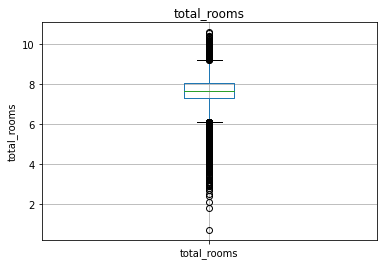

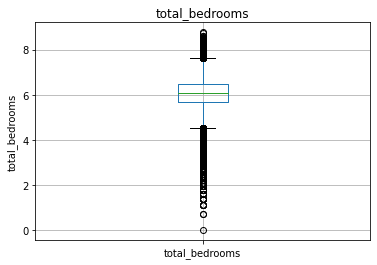

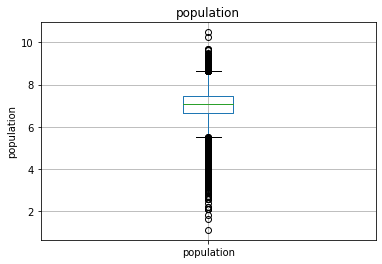

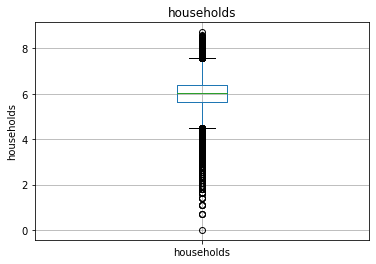

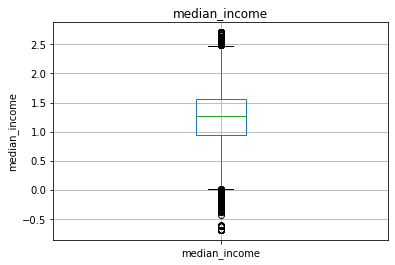

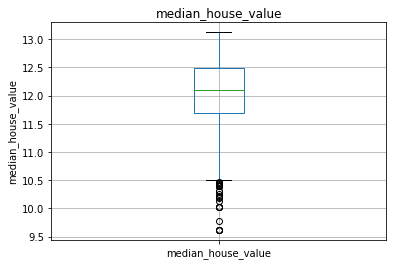

In [16]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

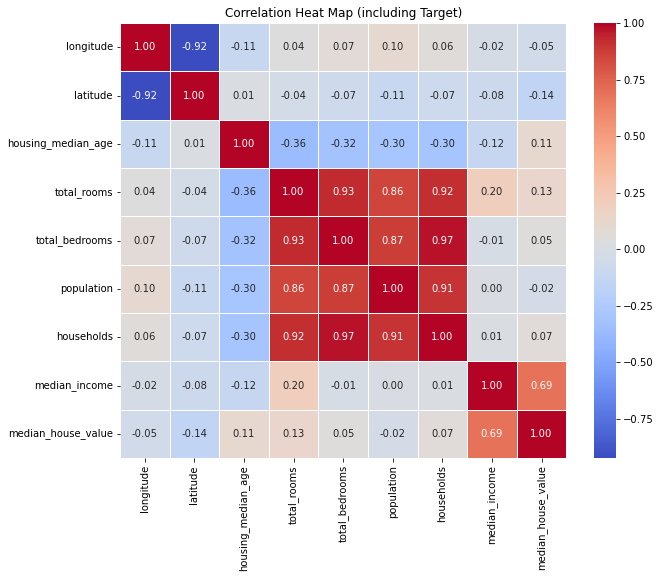

In [17]:
for feature in continuous_feature:
    data=df.copy()
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))  # Set the size of the plot (optional)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Correlation Heat Map (including Target)")
plt.show()


In [18]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['ocean_proximity']

In [19]:
df[categorical_features].head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [20]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is ocean_proximity and number of categories are 5


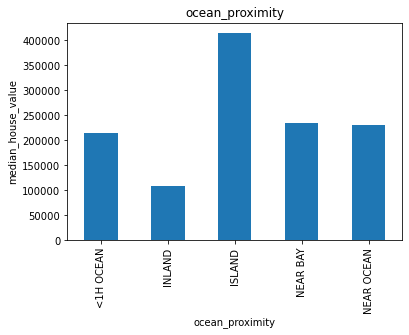

In [21]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['median_house_value'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('median_house_value')
    plt.title(feature)
    plt.show()

In [22]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [23]:
num_features=['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

for feature in num_features:
    df[feature]=np.log(df[feature])

In [24]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,3.713572,6.779922,4.859812,5.774552,4.836282,2.119287,NEAR BAY,13.022764
1,-122.22,37.86,3.044522,8.867709,7.008505,7.783641,7.037028,2.116424,NEAR BAY,12.789684
2,-122.24,37.85,3.951244,7.290975,5.247024,6.206576,5.176150,1.982022,NEAR BAY,12.771671
3,-122.25,37.85,3.951244,7.149917,5.459586,6.324359,5.389072,1.730434,NEAR BAY,12.740517
4,-122.25,37.85,3.951244,7.394493,5.634790,6.336826,5.556828,1.347086,NEAR BAY,12.743151


In [25]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [26]:
dummies= pd.get_dummies(df.ocean_proximity)
dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [27]:
dummies.shape

(20640, 5)

In [28]:
data=pd.concat([df,dummies],axis='columns')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,3.713572,6.779922,4.859812,5.774552,4.836282,2.119287,NEAR BAY,13.022764,0,0,0,1,0
1,-122.22,37.86,3.044522,8.867709,7.008505,7.783641,7.037028,2.116424,NEAR BAY,12.789684,0,0,0,1,0
2,-122.24,37.85,3.951244,7.290975,5.247024,6.206576,5.176150,1.982022,NEAR BAY,12.771671,0,0,0,1,0
3,-122.25,37.85,3.951244,7.149917,5.459586,6.324359,5.389072,1.730434,NEAR BAY,12.740517,0,0,0,1,0
4,-122.25,37.85,3.951244,7.394493,5.634790,6.336826,5.556828,1.347086,NEAR BAY,12.743151,0,0,0,1,0


In [29]:
data.shape

(20640, 15)

In [30]:
data.drop(['ocean_proximity','NEAR OCEAN'],axis='columns',inplace=True)

In [31]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY
0,-122.23,37.88,3.713572,6.779922,4.859812,5.774552,4.836282,2.119287,13.022764,0,0,0,1
1,-122.22,37.86,3.044522,8.867709,7.008505,7.783641,7.037028,2.116424,12.789684,0,0,0,1
2,-122.24,37.85,3.951244,7.290975,5.247024,6.206576,5.176150,1.982022,12.771671,0,0,0,1
3,-122.25,37.85,3.951244,7.149917,5.459586,6.324359,5.389072,1.730434,12.740517,0,0,0,1
4,-122.25,37.85,3.951244,7.394493,5.634790,6.336826,5.556828,1.347086,12.743151,0,0,0,1


In [32]:
data.columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY'],
      dtype='object')

In [33]:
y=data['median_house_value']

In [34]:
x=data[['longitude', 'latitude','housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY']]

In [35]:
y.shape

(20640,)

In [36]:
x.shape

(20640, 12)

In [37]:
## for feature selection 
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [92]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [93]:
feature_sel_model.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False])

In [94]:
selected_feat = x.columns[(feature_sel_model.get_support())]
selected_feat

Index(['longitude', 'latitude', 'housing_median_age', 'total_bedrooms',
       'population', 'households', 'median_income', '<1H OCEAN', 'INLAND'],
      dtype='object')

In [95]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY
0,-122.23,37.88,3.713572,6.779922,4.859812,5.774552,4.836282,2.119287,13.022764,0,0,0,1
1,-122.22,37.86,3.044522,8.867709,7.008505,7.783641,7.037028,2.116424,12.789684,0,0,0,1
2,-122.24,37.85,3.951244,7.290975,5.247024,6.206576,5.176150,1.982022,12.771671,0,0,0,1
3,-122.25,37.85,3.951244,7.149917,5.459586,6.324359,5.389072,1.730434,12.740517,0,0,0,1
4,-122.25,37.85,3.951244,7.394493,5.634790,6.336826,5.556828,1.347086,12.743151,0,0,0,1


In [121]:
x=x[selected_feat]

In [123]:
x.shape

(20640, 9)

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9598)

In [126]:
x_train.shape

(16512, 9)

In [127]:
x_test.shape

(4128, 9)

In [128]:
y_train.shape

(16512,)

In [129]:
y_test.shape

(4128,)

### StandardScaler

In [147]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

# fit the scaler to the train set, it will learn the parametrs
scaler.fit(x_train)

# transform train and test sets

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [148]:
scaler.mean_

array([-119.56539608,   35.62574188,    3.22696185,    6.04941225,
          7.02157578,    5.97706934,    1.24459325,    0.44155766,
          0.31837452])

In [149]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [150]:
np.round(x_train_scaled.describe(),1)

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND
count,16512.0,16512.0,16512.0,16512.0,16512.0,16512.0,16512.0,16512.0,16512.0
mean,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.4,-1.4,-5.7,-8.3,-8.0,-8.1,-4.1,-0.9,-0.7
25%,-1.1,-0.8,-0.6,-0.5,-0.5,-0.5,-0.6,-0.9,-0.7
50%,0.5,-0.6,0.2,0.0,0.1,0.0,0.0,-0.9,-0.7
75%,0.8,1.0,0.7,0.6,0.6,0.6,0.7,1.1,1.5
max,2.6,3.0,1.3,3.7,4.7,3.7,3.1,1.1,1.5


In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model = LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [152]:
y_pred = model.predict(x_test_scaled)

In [153]:
y_pred

array([11.51334796, 11.80518614, 12.42692178, ..., 12.93424616,
       12.44002724, 11.3557938 ])

In [154]:
y_test

12350    11.459525
12143    11.712596
11215    12.021549
16963    12.869276
9186     12.686336
           ...    
6788     12.327405
2248     11.705197
5738     12.914601
11371    12.344094
9580     11.470018
Name: median_house_value, Length: 4128, dtype: float64

In [155]:
mse=cross_val_score(model,x_train_scaled,y_train,scoring='neg_mean_squared_error',cv=10)

In [156]:
mse

array([-0.10796001, -0.09953716, -0.10171783, -0.10124078, -0.11174688,
       -0.09602397, -0.1009934 , -0.0990555 , -0.09826643, -0.11163293])

In [157]:
np.mean(mse)

-0.1028174890915385

In [158]:
# prediction
reg_pred=model.predict(x_test_scaled)

In [159]:
reg_pred

array([11.51334796, 11.80518614, 12.42692178, ..., 12.93424616,
       12.44002724, 11.3557938 ])

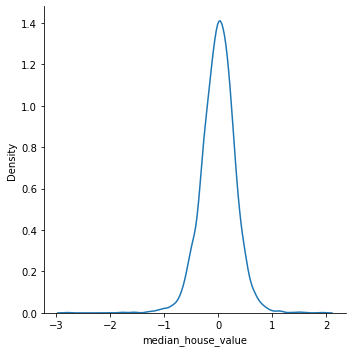

In [160]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [161]:
from sklearn.metrics import r2_score

In [162]:
score=r2_score(reg_pred,y_test)

In [163]:
score

0.554388028179571